In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import kneed

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_schools = pd.read_csv("Masterlist of Schools.csv", index_col="school.id")

df_location = pd.read_csv("Schools Location Data.csv", 
                          encoding = "latin-1", 
                          index_col="School ID",
                          usecols=["School ID", "Enrolment", "Latitude", "Longitude"])

df_rooms = pd.read_csv('Rooms data.csv', index_col="School ID")

df_teachers = pd.read_csv("Teachers data.csv", index_col="school.id")

df_elementary = pd.read_csv("Enrollment Master Data_2015_E.csv")[:-1].astype(int).set_index("School ID")

df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_mooe = (pd.read_csv('MOOE data.csv', index_col="school.id", usecols=["school.id", " school.mooe "])
             .replace(",", "", regex=True).astype(float))

In [4]:
df_all = pd.concat([df_schools, df_location, df_rooms, df_teachers, df_elementary, df_secondary, df_mooe], axis=1)

df_all.head()

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe
100001,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,Apaleng-Libtong PS,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban,90.0,18.253666,120.606180,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0
100002,Bacarra CES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,456.0,18.250964,120.608958,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268000.0
100003,Buyon ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,167.0,18.234599,120.616037,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0
100004,Ganagan ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,NaN,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,122.0,18.250014,120.587169,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116000.0
100005,Macupit ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100005.0,Macupit,1/1/1913,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,77.0,18.293994,120.641019,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.0


In [5]:
df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_secondary.head()

,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS
School ID,,,,,,,,,,,,,,
300001,20,12,13,17,10,15,17,14,0,0,0,0,0,0
300002,240,288,229,258,225,231,261,207,0,0,0,0,0,0
300003,89,84,78,88,65,76,54,79,0,0,0,0,0,0
300004,38,47,47,54,39,42,52,45,0,0,0,0,0,0
300005,78,70,60,61,68,64,53,50,0,0,0,0,0,0


In [6]:
df_all.isna().sum()

school.name                     148
school.region                   148
school.region.name              148
school.province                 148
school.cityhall                 149
school.division                 148
school.citymuni                 148
school.district                 148
school.legdistrict              148
school.type                     148
school.abbrev                 28584
school.previousname            4530
school.mother.id                155
school.address                 2130
school.established              157
school.classification           148
school.classification2          148
school.curricularclass          148
school.organization             148
school.cityincome              1124
school.cityclass              38538
school.urban                    151
Enrolment                       127
Latitude                        130
Longitude                       130
rooms.standard.academic         339
rooms.standard.unused           339
rooms.nonstandard.academic  

In [7]:
df_all[df_all.index.duplicated(keep=False)]

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe


In [8]:
df_all.columns

Index(['school.name', 'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'Enrolment', 'Latitude',
       'Longitude', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Femal

In [9]:
df_all['Total Elementary SPED Students'] = df_all['SPED NG Male'] + df_all['SPED NG Female']
df_all['Total Secondary SPED Students'] = df_all['SPED NG Male SS'] + df_all['SPED NG Female SS']
df_all['Total Rooms'] = (df_all['rooms.standard.academic'] + 
                             df_all['rooms.standard.unused'] + 
                             df_all['rooms.nonstandard.academic'] + 
                             df_all['rooms.nonstandard.unused'])
df_all['Other Teachers'] = (df_all['teachers.instructor'] + 
                             df_all['teachers.mobile'] + 
                             df_all['teachers.regular'])
                            
df_all['SPED Teachers'] = df_all['teachers.sped']

df_all['Total Teachers'] = df_all['Other Teachers'] + df_all['SPED Teachers']

df_all['ST Ratio'] = df_all['Enrolment'] / df_all['Total Teachers']

df_all['Students per Room Ratio'] = df_all['Total Rooms']/df_all['Enrolment']

df_all['MOOE per Student Ratio'] = df_all[' school.mooe ']/df_all['Enrolment']

In [10]:
df_eda = df_all[['school.region','school.classification','ST Ratio','Students per Room Ratio','MOOE per Student Ratio']]

In [11]:
df_eda

,school.region,school.classification,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
100001,Region I,Elementary,45.000000,0.022222,933.333333
100002,Region I,Elementary,26.823529,0.026316,587.719298
100003,Region I,Elementary,23.857143,0.035928,808.383234
100004,Region I,Elementary,17.428571,0.049180,950.819672
100005,Region I,Elementary,11.000000,0.077922,1493.506494
...,...,...,...,...,...
326101,Region XII,Secondary,NaN,0.007634,664.122137
326102,Region XII,Secondary,NaN,0.010471,753.926702
326501,ARMM,Secondary,inf,NaN,NaN
356059,Region VII,Secondary,NaN,0.022059,1301.470588


In [12]:
df_eda.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
df_eda_missing = (df_eda.isnull().sum() / len(df_eda))*100
df_eda_missing = df_eda_missing.drop(df_eda_missing[df_eda_missing == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Percentage':df_eda_missing})
missing_data

,Missing Percentage
MOOE per Student Ratio,5.828752
ST Ratio,5.610575
Students per Room Ratio,1.075913
school.classification,0.316571
school.region,0.316571


In [14]:
df_eda_copy = df_eda

In [15]:
df_eda_copy.head()

,school.region,school.classification,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
100001,Region I,Elementary,45.000000,0.022222,933.333333
100002,Region I,Elementary,26.823529,0.026316,587.719298
100003,Region I,Elementary,23.857143,0.035928,808.383234
100004,Region I,Elementary,17.428571,0.049180,950.819672
100005,Region I,Elementary,11.000000,0.077922,1493.506494


In [16]:
df_clean = df_eda_copy.dropna()
df_clean.shape

(41844, 5)

In [17]:
dropped_rows = df_eda.shape[0] - df_clean.shape[0]
dropped_rows

4907

In [18]:
df_clean.columns

Index(['school.region', 'school.classification', 'ST Ratio',
       'Students per Room Ratio', 'MOOE per Student Ratio'],
      dtype='object')

In [19]:
df_elementary = df_clean[df_clean['school.classification']=='Elementary']
df_secondary =  df_clean[df_clean['school.classification']=='Secondary']

In [20]:
df_elementary.describe()

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
count,35940.000000,35940.000000,35940.000000
mean,39.076308,0.029350,761.903430
std,15.762171,0.016726,514.911549
min,1.600000,0.000000,172.376874
25%,29.500000,0.020588,518.999784
50%,37.333333,0.026201,628.906250
75%,45.750000,0.034091,816.326531
max,496.000000,0.625000,18666.666667


In [21]:
df_secondary.describe()

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
count,5904.000000,5904.000000,5904.000000
mean,37.161984,0.021285,1228.439257
std,36.059085,0.013114,946.047087
min,0.875000,0.000000,561.704483
25%,25.888889,0.016226,959.268926
50%,32.431677,0.020049,1101.647095
75%,39.684441,0.024476,1316.235783
max,1570.000000,0.714286,39857.142857


# Clustering

In [22]:
df_elementary.columns

Index(['school.region', 'school.classification', 'ST Ratio',
       'Students per Room Ratio', 'MOOE per Student Ratio'],
      dtype='object')

In [23]:
df_elementary_kmeans = df_elementary[['ST Ratio','Students per Room Ratio','MOOE per Student Ratio']]
df_secondary_kmeans = df_secondary[['ST Ratio','Students per Room Ratio','MOOE per Student Ratio']]

### Elementary Data

In [24]:
df_elementary_kmeans.head()

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
100001,45.000000,0.022222,933.333333
100002,26.823529,0.026316,587.719298
100003,23.857143,0.035928,808.383234
100004,17.428571,0.049180,950.819672
100005,11.000000,0.077922,1493.506494


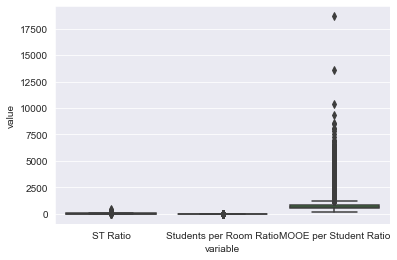

In [25]:
melted = df_elementary_kmeans.melt()

sns.boxplot(melted.variable, melted.value)

In [26]:
#Remove MOOE outliers

Q1 = df_elementary_kmeans['MOOE per Student Ratio'].quantile(0.25)
Q3 = df_elementary_kmeans['MOOE per Student Ratio'].quantile(0.75)
IQR = Q3 - Q1
df_elementary_kmeans = (df_elementary_kmeans[(df_elementary_kmeans['MOOE per Student Ratio'] >= Q1 - 1.5*IQR) & 
                           (df_elementary_kmeans['MOOE per Student Ratio'] <= Q3 + 1.5*IQR)])

In [27]:
#Remove ST Ratio outliers
Q1 = df_elementary_kmeans['ST Ratio'].quantile(0.25)
Q3 = df_elementary_kmeans['ST Ratio'].quantile(0.75)
IQR = Q3 - Q1
df_elementary_kmeans = (df_elementary_kmeans[(df_elementary_kmeans['ST Ratio'] >= Q1 - 1.5*IQR) & 
                           (df_elementary_kmeans['ST Ratio'] <= Q3 + 1.5*IQR)])

In [28]:
from mpl_toolkits.mplot3d import Axes3D

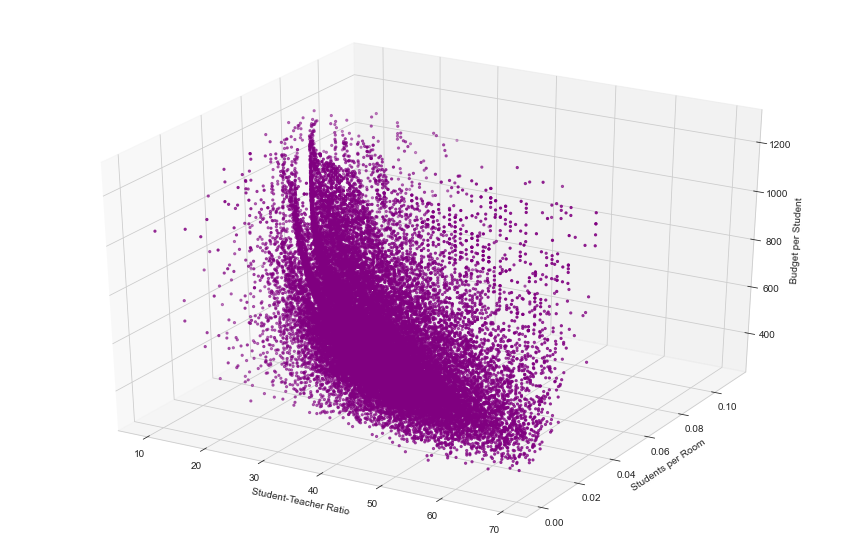

In [29]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ST_Ratio = df_elementary_kmeans['ST Ratio']
Rooms = df_elementary_kmeans['Students per Room Ratio']
Budget = df_elementary_kmeans['MOOE per Student Ratio']
ax.scatter(ST_Ratio, Rooms, Budget, s=5,c='purple')

ax.set_xlabel('Student-Teacher Ratio')
ax.set_ylabel('Students per Room')
ax.set_zlabel('Budget per Student')

plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_elementary_kmeans_scaled = scaler.fit_transform(df_elementary_kmeans)

In [31]:
print(df_elementary_kmeans_scaled.min())
print(df_elementary_kmeans_scaled.max())

-2.720115759931412
8.172093579250026


## K-Means

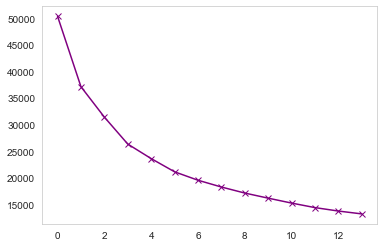

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples

ssd = []
db={}

df_elementary_kmeans

range_n_clusters = list(np.arange(2,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_elementary_kmeans_scaled)
    
    ssd.append(kmeans.inertia_)
    db[num_clusters2] = davies_bouldin_score(df_elementary_kmeans_scaled,kmeans.labels_)
   
    
# plot the SSDs for each n_clusters
plt.plot(ssd,'bx-',c='purple')

In [55]:
from kneed import *

#k-means elbow
k1 = KneeLocator(range(2,16), ssd, curve='convex', direction='decreasing')
k1.elbow

5

In [46]:
print(list(db.keys())[list(db.values()).index(min(db.values()))])

15


In [47]:
df_elementary_kmeans_scaled

array([[ 0.6121978 , -0.49126193,  1.43603858],
       [-1.08149553, -0.09229161, -0.36373109],
       [-1.35790502,  0.84455486,  0.78536651],
       ...,
       [ 2.47580858,  0.34175302, -0.08614068],
       [ 0.19288537,  2.15587448,  1.7189127 ],
       [ 0.81550079, -1.62425857, -1.60816559]])

In [50]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_elementary_kmeans_scaled)
cluster_labels_1 = kmeans.predict(df_elementary_kmeans_scaled)   

df_elementary_kmeans['Cluster_Labels'] = cluster_labels_1
df_elementary_kmeans['Cluster_Labels'].value_counts()

4    11288
2     7642
1     6754
3     3713
0     2750
Name: Cluster_Labels, dtype: int64

In [51]:
df_elementary_kmeans

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,Cluster_Labels
100001,45.000000,0.022222,933.333333,0
100002,26.823529,0.026316,587.719298,2
100003,23.857143,0.035928,808.383234,2
100004,17.428571,0.049180,950.819672,3
100006,18.714286,0.053435,961.832061,3
...,...,...,...,...
250501,39.400000,0.025381,639.593909,4
251501,65.875000,0.004981,350.569260,1
259006,65.000000,0.030769,641.025641,1
260501,40.500000,0.049383,987.654321,3


## Silhouette Score 

In [54]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
range_n_clusters = list(np.arange(2,9))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_elementary_kmeans_scaled)
    
    cluster_labels = kmeans.predict(df_elementary_kmeans_scaled)
    
    # silhouette score
    silhouette_avg = silhouette_score(df_elementary_kmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.42294428685058
For n_clusters=3, the silhouette score is 0.3346473929668596
For n_clusters=4, the silhouette score is 0.2883819763062564
For n_clusters=5, the silhouette score is 0.3081771306326946
For n_clusters=6, the silhouette score is 0.2726720273016753
For n_clusters=7, the silhouette score is 0.28507820702428627
For n_clusters=8, the silhouette score is 0.2574639868836544


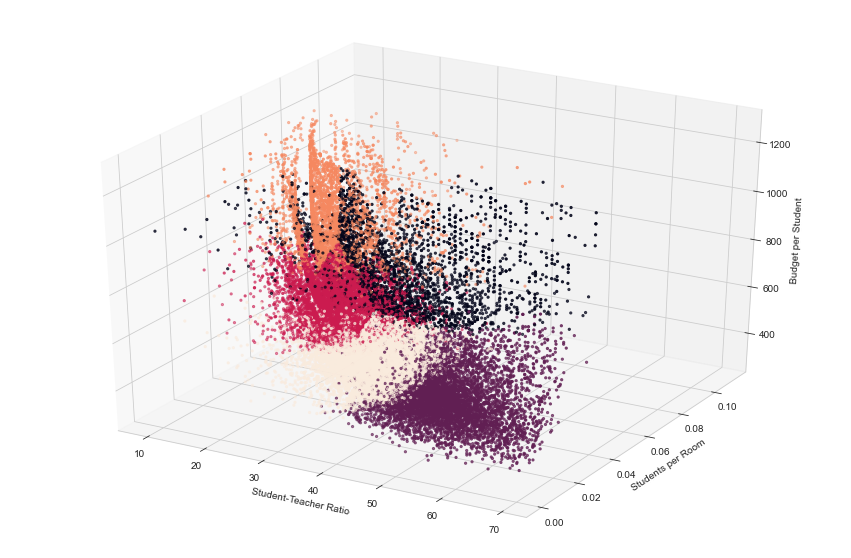

In [53]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ST_Ratio = df_elementary_kmeans['ST Ratio']
Rooms = df_elementary_kmeans['Students per Room Ratio']
Budget = df_elementary_kmeans['MOOE per Student Ratio']
Cluster = df_elementary_kmeans['Cluster_Labels']
ax.scatter(ST_Ratio, Rooms, Budget, s=5, c = Cluster)


ax.set_xlabel('Student-Teacher Ratio')
ax.set_ylabel('Students per Room')
ax.set_zlabel('Budget per Student')

plt.show()

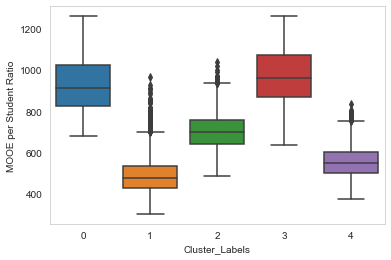

In [56]:
sns.boxplot(x=df_elementary_kmeans.Cluster_Labels, y=df_elementary_kmeans["MOOE per Student Ratio"])

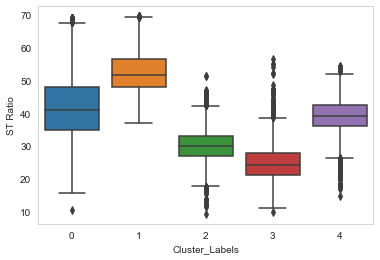

In [57]:
sns.boxplot(x=df_elementary_kmeans.Cluster_Labels, y=df_elementary_kmeans["ST Ratio"])

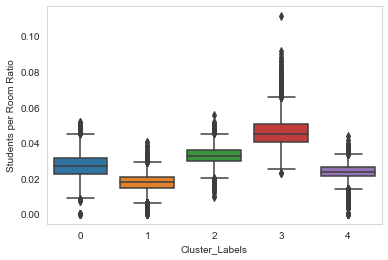

In [58]:
sns.boxplot(x=df_elementary_kmeans.Cluster_Labels, y=df_elementary_kmeans["Students per Room Ratio"])

IndexError: too many indices for array

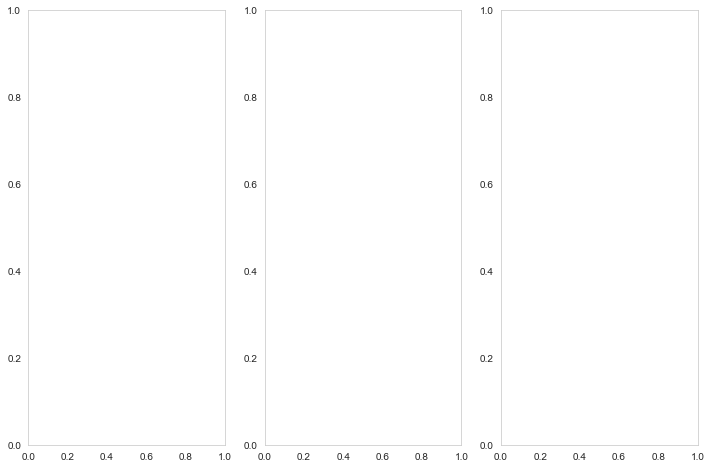

In [59]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

sns.boxplot(x="Cluster_Labels", y="MOOE per Student Ratio", data=df_elementary_kmeans, ax=axes[0,0])
axes[0,0].set_title("Budget per Student", fontsize=16)

sns.boxplot(x=df_elementary_kmeans.Cluster_Labels, y=df_elementary_kmeans["ST Ratio"], ax=axes[0,1])
axes[0,1].set_title("Student-Teacher Ratio", fontsize=16)

sns.boxplot(x=df_elementary_kmeans.Cluster_Labels, y=df_elementary_kmeans["Students per Room Ratio"], ax=axes[0,2])
axes[0,2].set_title("Budget per Student", fontsize=16)

plt.tight_layout()
plt.show();

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df_elementary_kmeans)

df_minmax = pd.DataFrame(df_minmax, index=df_elementary_kmeans.index, columns=df_elementary_kmeans.columns)

# df_minmax['Cluster_Labels'] = cluster_labels

df_clusters = df_minmax.set_index("Cluster_Labels")
df_clusters = df_clusters.groupby("Cluster_Labels").mean().reset_index()
df_clusters

,Cluster_Labels,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,db score,DB Score
0,0.0,0.302039,0.369880,0.649266,0.0,0.0
1,0.5,0.666664,0.169419,0.226472,0.0,0.0
2,1.0,0.429918,0.243549,0.348542,0.0,0.0


In [193]:
from math import pi
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('Cluster_Labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)

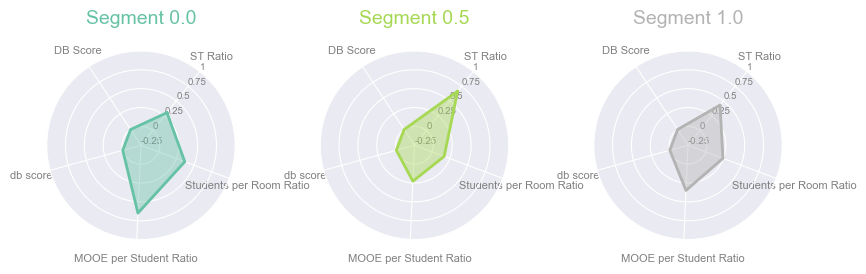

In [194]:
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Segment '+(df_clusters['Cluster_Labels'][row]).astype(str), 
                color=my_palette(row))

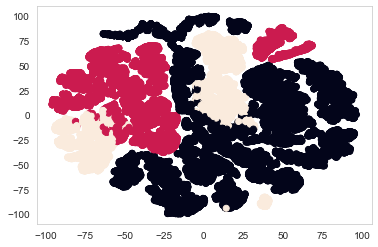

In [93]:
# t-SNE visualization of grain dataset

# Import TSNE
from sklearn.manifold import TSNE

variety_numbers = list(df_elementary_kmeans.iloc[:,-1])

# Create a TSNE instance: model
model = TSNE(learning_rate=300, perplexity=30)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df_elementary_kmeans_scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

## Hierachical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
mergings1 = linkage(df_elementary_kmeans_scaled, method="single", metric='euclidean')

dendrogram(mergings1, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

In [ ]:
cluster_labels_h1 = cut_tree(mergings1, n_clusters=4).reshape(-1, )

df_elementary_kmeans_h1 = df_elementary_kmeans

df_elementary_kmeans_h1['Cluster_Labels'] = cluster_labels_h1
df_elementary_kmeans_h1['Cluster_Labels'].value_counts()

In [ ]:
mergings2 = linkage(df_elementary_kmeans_scaled, method="complete", metric='euclidean')

dendrogram(mergings2, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

In [ ]:
mergings3 = linkage(df_elementary_kmeans_scaled, method="average", metric='euclidean')

dendrogram(mergings3, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

In [ ]:
mergings4 = linkage(df_elementary_kmeans_scaled, method="centroid", metric='euclidean')

dendrogram(mergings4, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

## Secondary Data

In [40]:
df_secondary_kmeans.head()

,ST Ratio,school.mooe,Total Rooms
300001,16.857143,232000.0,4.0
300002,29.378788,1839000.0,43.0
300003,21.137931,701000.0,18.0
300004,30.333333,440000.0,11.0
300005,10.080000,793000.0,14.0


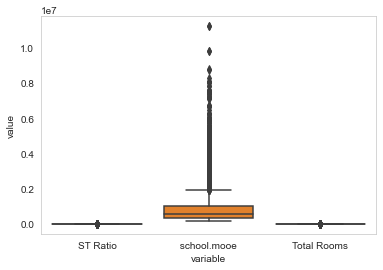

In [41]:
melted = df_secondary_kmeans.melt()

sns.boxplot(melted.variable, melted.value)

In [42]:
#Remove MOOE outliers

Q1 = df_secondary_kmeans[' school.mooe '].quantile(0.25)
Q3 = df_secondary_kmeans[' school.mooe '].quantile(0.75)
IQR = Q3 - Q1
df_secondary_kmeans = (df_secondary_kmeans[(df_secondary_kmeans[' school.mooe '] >= Q1 - 1.5*IQR) & 
                           (df_secondary_kmeans[' school.mooe '] <= Q3 + 1.5*IQR)])

In [43]:
#Remove ST Ratio outliers
Q1 = df_secondary_kmeans['ST Ratio'].quantile(0.25)
Q3 = df_secondary_kmeans['ST Ratio'].quantile(0.75)
IQR = Q3 - Q1
df_secondary_kmeans = (df_secondary_kmeans[(df_secondary_kmeans['ST Ratio'] >= Q1 - 1.5*IQR) & 
                           (df_secondary_kmeans['ST Ratio'] <= Q3 + 1.5*IQR)])

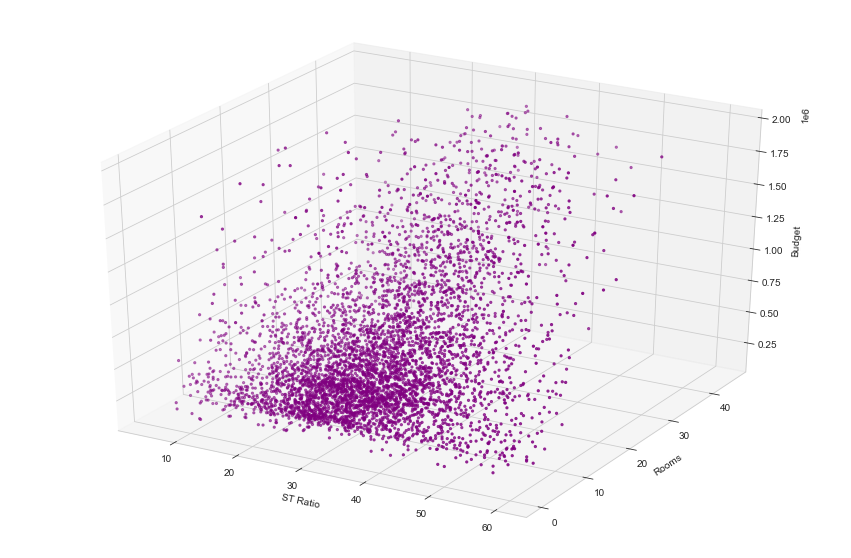

In [44]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ST_Ratio = df_secondary_kmeans['ST Ratio']
Rooms = df_secondary_kmeans['Total Rooms']
Budget = df_secondary_kmeans[' school.mooe ']
ax.scatter(ST_Ratio, Rooms, Budget, s=5,c='purple')

ax.set_xlabel('ST Ratio')
ax.set_ylabel('Rooms')
ax.set_zlabel('Budget')

plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_secondary_kmeans_scaled = scaler.fit_transform(df_secondary_kmeans)

In [46]:
print(df_secondary_kmeans_scaled.min())
print(df_secondary_kmeans_scaled.max())

-2.7184490075111647
4.462567572730971


## K-Means 

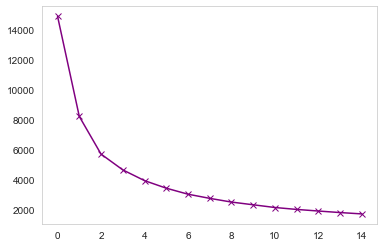

In [47]:
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_secondary_kmeans_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd,'bx-',c='purple')

In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_secondary_kmeans_scaled)
cluster_labels = kmeans.predict(df_secondary_kmeans_scaled)   

df_secondary_kmeans['Cluster_Labels'] = cluster_labels
df_secondary_kmeans['Cluster_Labels'].value_counts()

2    2149
0    1771
1    1056
Name: Cluster_Labels, dtype: int64

## Silhouette Score 

In [60]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
range_n_clusters = list(np.arange(2,9))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_secondary_kmeans_scaled)
    
    cluster_labels = kmeans.predict(df_secondary_kmeans_scaled)
    
    # silhouette score
    silhouette_avg = silhouette_score(df_secondary_kmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4666018769035537
For n_clusters=3, the silhouette score is 0.35453424336942
For n_clusters=4, the silhouette score is 0.34346853414014084
For n_clusters=5, the silhouette score is 0.30803235443886673
For n_clusters=6, the silhouette score is 0.3101751367291622
For n_clusters=7, the silhouette score is 0.30917899663259885
For n_clusters=8, the silhouette score is 0.3084901784524468


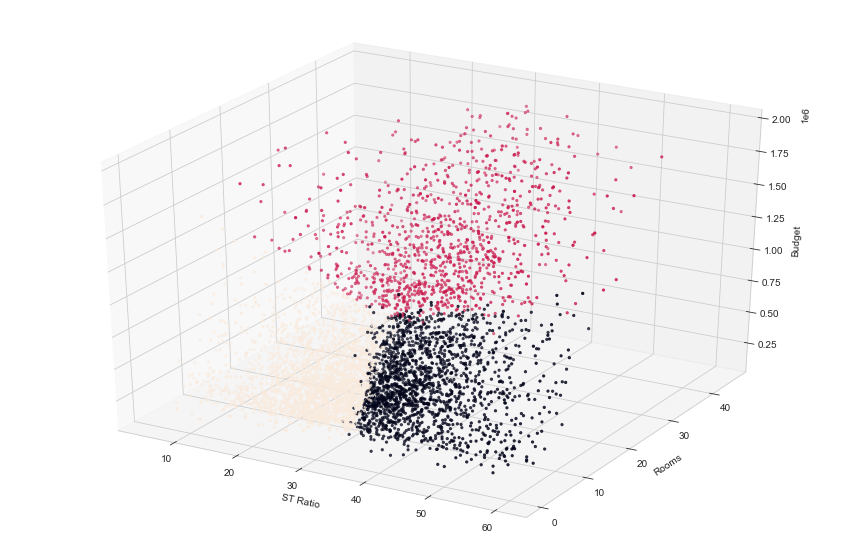

In [99]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ST_Ratio = df_secondary_kmeans['ST Ratio']
Rooms = df_secondary_kmeans['Total Rooms']
Budget = df_secondary_kmeans[' school.mooe ']
Cluster = df_secondary_kmeans['Cluster_Labels']
ax.scatter(ST_Ratio, Rooms, Budget, s=5, c = Cluster)

ax.set_xlabel('ST Ratio')
ax.set_ylabel('Rooms')
ax.set_zlabel('Budget')

plt.show()

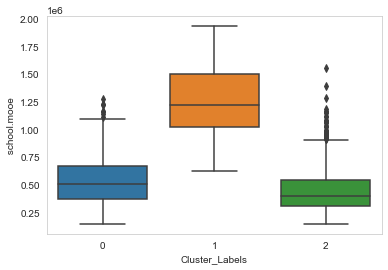

In [84]:
sns.boxplot(x=df_secondary_kmeans.Cluster_Labels, y=df_secondary_kmeans[" school.mooe "])

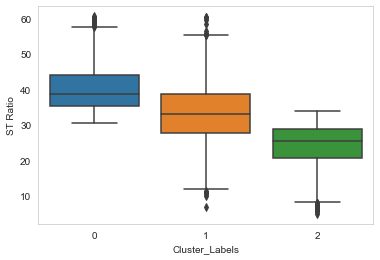

In [85]:
sns.boxplot(x=df_secondary_kmeans.Cluster_Labels, y=df_secondary_kmeans["ST Ratio"])

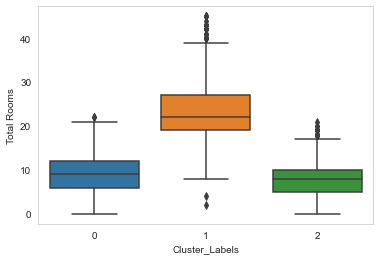

In [86]:
sns.boxplot(x=df_secondary_kmeans.Cluster_Labels, y=df_secondary_kmeans["Total Rooms"])

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df_secondary_kmeans)

df_minmax = pd.DataFrame(df_minmax, index=df_secondary_kmeans.index, columns=df_secondary_kmeans.columns)

# df_minmax['Cluster_Labels'] = cluster_labels

df_clusters = df_minmax.set_index("Cluster_Labels")
df_clusters = df_clusters.groupby("Cluster_Labels").mean().reset_index()
df_clusters

,Cluster_Labels,ST Ratio,school.mooe,Total Rooms
0,0.0,0.636887,0.212956,0.205245
1,0.5,0.509295,0.629410,0.514015
2,1.0,0.346465,0.165120,0.177219


In [88]:
from math import pi
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('Cluster_Labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)

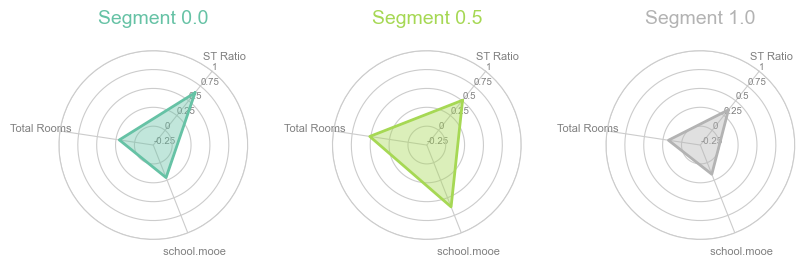

In [89]:
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Segment '+(df_clusters['Cluster_Labels'][row]).astype(str), 
                color=my_palette(row))

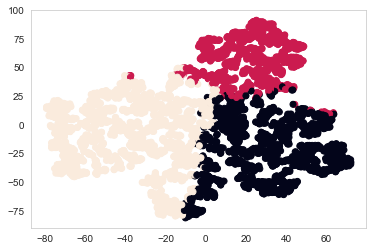

In [91]:
# t-SNE visualization of grain dataset

# Import TSNE
from sklearn.manifold import TSNE

variety_numbers = list(df_secondary_kmeans.iloc[:,-1])

# Create a TSNE instance: model
model = TSNE(learning_rate=300, perplexity=30)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df_secondary_kmeans_scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

# Hierarchical Clustering

## Elementary 

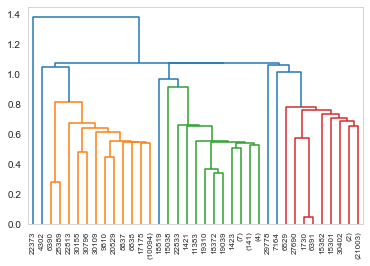

1    21014
0    10106
2      161
3        1
Name: Cluster_Labels, dtype: int64

In [102]:
mergings2 = linkage(df_elementary_kmeans_scaled, method="complete", metric='euclidean')

dendrogram(mergings2, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

MemoryError: unable to allocate array data.

In [ ]:
mergings3 = linkage(df_elementary_kmeans_scaled, method="average", metric='euclidean')

dendrogram(mergings3, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

In [ ]:
mergings4 = linkage(df_elementary_kmeans_scaled, method="centroid"", metric='euclidean')

dendrogram(mergings4, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

## Secondary 

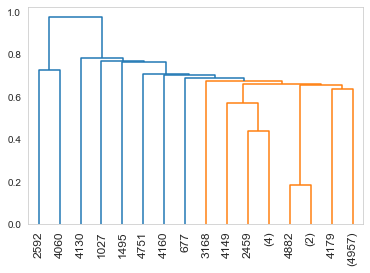

In [104]:
mergings5 = linkage(df_secondary_kmeans_scaled, method="single", metric='euclidean')

dendrogram(mergings5, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

In [ ]:
cluster_labels_h5 = cut_tree(mergings5, n_clusters=3).reshape(-1, )

df_secondary_kmeans_h5 = df_secondary_kmeans

df_secondary_kmeans_h5['Cluster_Labels'] = cluster_labels
df_secondary_kmeans_h5['Cluster_Labels'].value_counts()

In [ ]:
mergings6 = linkage(df_secondary_kmeans_scaled, method="complete", metric='euclidean')

dendrogram(mergings6, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

In [ ]:
mergings7 = linkage(df_secondary_kmeans_scaled, method="average", metric='euclidean')

dendrogram(mergings7, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

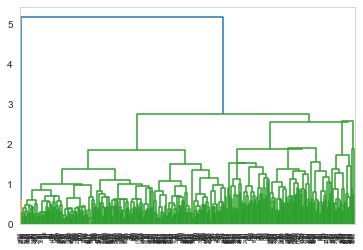

In [103]:
mergings8 = linkage(df_secondary_kmeans_scaled, method="centroid", metric='euclidean')

dendrogram(mergings8, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()